In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
import sklearn
import math
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from sklearn.model_selection import train_test_split as ts


In [2]:
# Reading csv filegoogle_data = pd.read_csv('E:\ml internship\googleplaystore.csv')
gplay_df = pd.read_csv('E:\ml internship\googleplaystore.csv')

In [3]:
#Displaying the head of the dataset
gplay_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [4]:
#Displaying the total number off Apps:
x = len(gplay_df)
print ('The number of records in the data set is: ', x)


The number of records in the data set is:  10841


In [5]:
#Removing duplicate Apps and filling Null values from the dataset:
gplay_df.drop_duplicates(subset='App', inplace=True)
gplay_df.replace(np.nan, 0) 
gplay_df = gplay_df.fillna(0) #Eliminating NA values and replacing with 0
y = len(gplay_df)
print ('The number of unique App records in the data set is: ', y)


The number of unique App records in the data set is:  9660


In [6]:

#Preparation for column Size
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('M', '') if 'M' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace(',', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: float(str(a).replace('k', ''))/1000 if 'k' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('Varies with device', 'NaN') if 'Varies with device' in str(a) else a)



#Preparation for column Installs
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('Free', 'NaN') if 'Free' in str(a) else a)


#Preparation for column Price
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('$', '') if '$' in str(a) else a)
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('Everyone', 'NaN') if 'Everyone' in str(a) else a)

#Preparation for column Reviews
gplay_df = gplay_df[~gplay_df.Reviews.str.contains("3.0M")]

#Converting all the values of these columns to floats
gplay_df['Size'] = gplay_df['Size'].apply(lambda a : float(a))
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a : float(a))
gplay_df['Price'] = gplay_df['Price'].apply(lambda a : float(a))
gplay_df['Reviews'] = gplay_df['Reviews'].apply(lambda a: float(a))
gplay_df['Rating'] = gplay_df['Rating'].apply(lambda a: float(a))

# Row 10472 removed due to missing value of Category
#gplay_df.drop(gplay_df.index[9660], inplace=True)

# Row [7312,8266] removed due to "Unrated" value in Content Rating
gplay_df.drop(gplay_df.index[[7312,8266]], inplace=True)

In [7]:
# Sort by "Category"
gplay_df.sort_values("Category", inplace = True)

In [8]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
gplay_df["Content Rating NUM"] = lb_make.fit_transform(gplay_df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
gplay_df["Category NUM"] = lb_make.fit_transform(gplay_df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in gplay_df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [9]:
# Replace "NaN" with mean 
imputer = Imputer()
gplay_df['Rating'] = imputer.fit_transform(gplay_df[['Rating']])
# Rounding the mean value to 1 decimal place
gplay_df['Rating'].round(1)
gplay_df.dropna(axis=0, inplace=True)


In [10]:
# Change datatype
gplay_df['Reviews'] = pd.to_numeric(gplay_df['Reviews'])
gplay_df['Installs'] = pd.to_numeric(gplay_df['Installs'])
gplay_df['Price'] = pd.to_numeric(gplay_df['Price'])

In [11]:
#After cleaning these columns and checking the length of the data once again:
z = len(gplay_df)
print ('The number of unique App records in the data set is: ', z)

The number of unique App records in the data set is:  8430


# Data Visualization

In [12]:
#Data Visualisation:
no_of_distinct_categories =  len(set(gplay_df['Category']))
print ('The dataset contains Apps belonging to', no_of_distinct_categories, 'Categories')

The dataset contains Apps belonging to 33 Categories


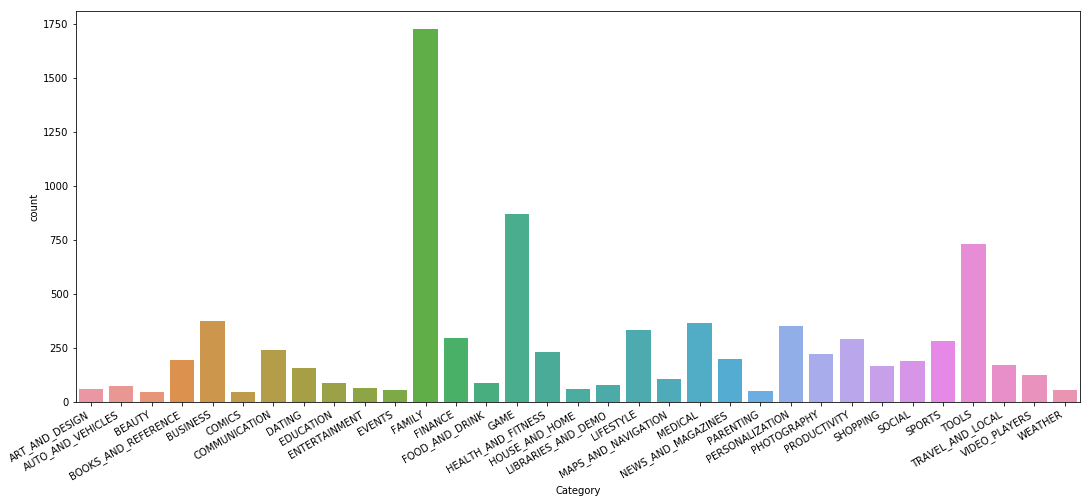

In [13]:
#Visualisation using matplotlib
#Number of categories of apps in the store
x = gplay_df.Category
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
fig.autofmt_xdate()
no_of_cat_plot = sns.categorical.countplot(x)
plt.show()

In [14]:
#The results of the above visualisation can be better represented in a table

cat_table = gplay_df.groupby('Category').size()
cat_table = cat_table.reset_index(name='Count').nlargest(10,'Count')
cat_table


,Category,Count
11,FAMILY,1725
14,GAME,873
29,TOOLS,731
4,BUSINESS,376
20,MEDICAL,368
23,PERSONALIZATION,351
18,LIFESTYLE,334
12,FINANCE,299
25,PRODUCTIVITY,291
28,SPORTS,285


C:\Users\GANESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


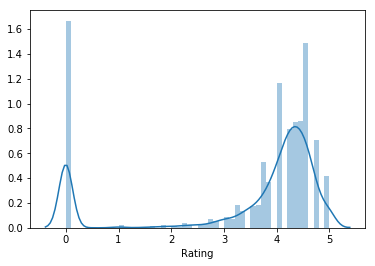

In [15]:
#Distribution of ratings for the dataset 
sns.distplot(gplay_df['Rating'])

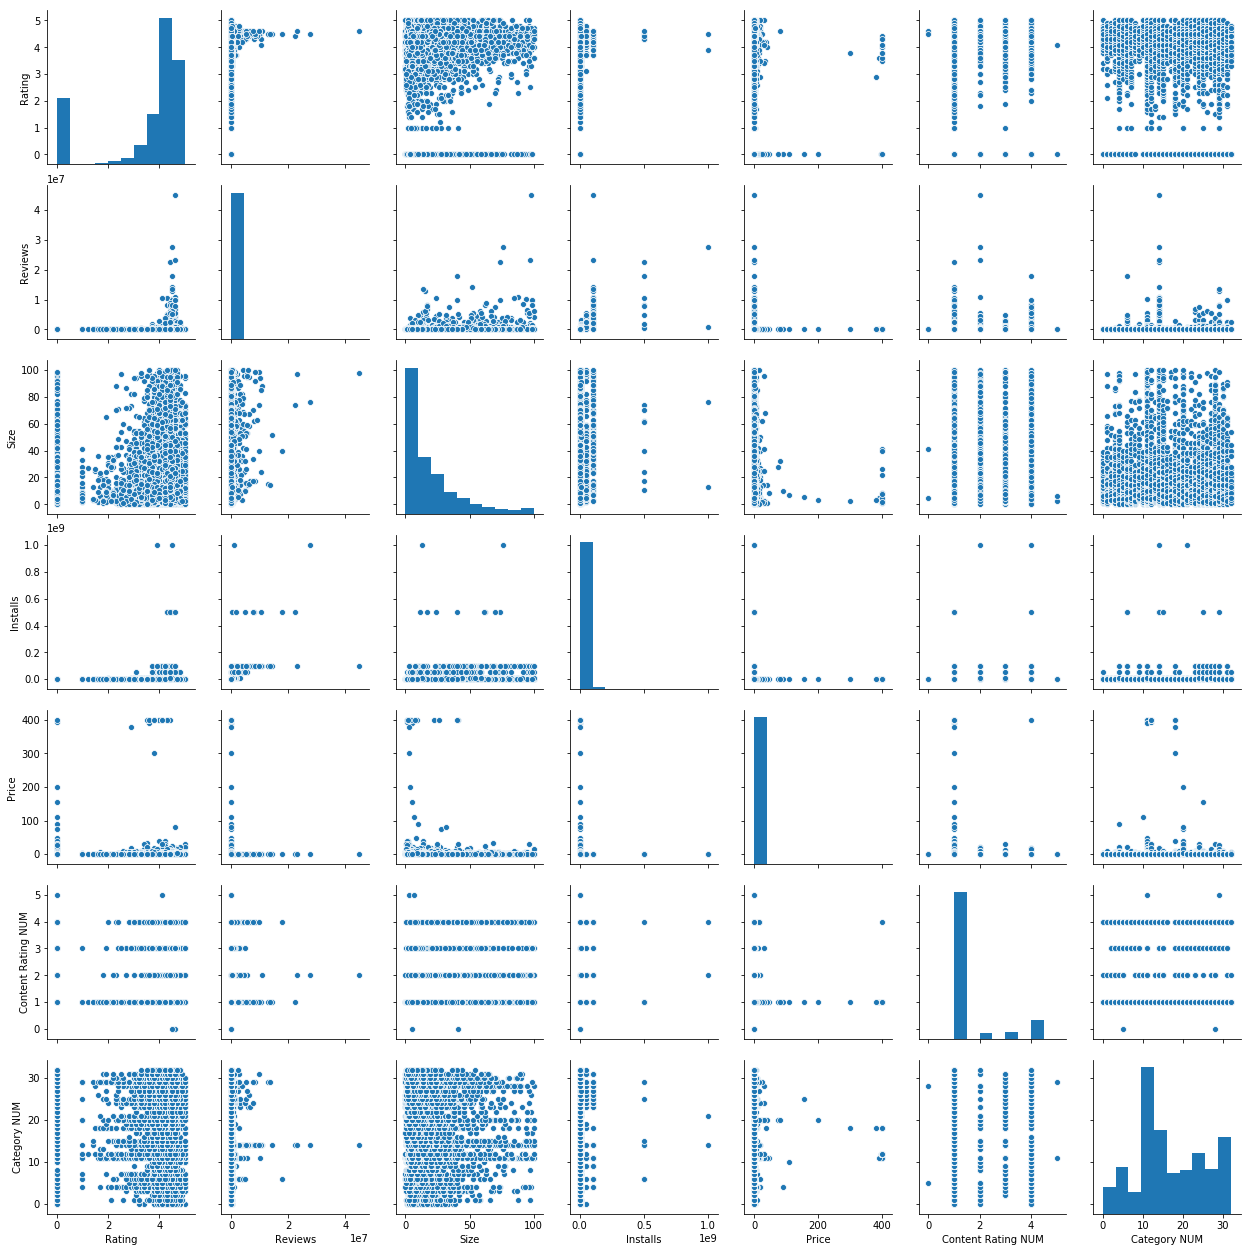

In [16]:
sns.pairplot(gplay_df)

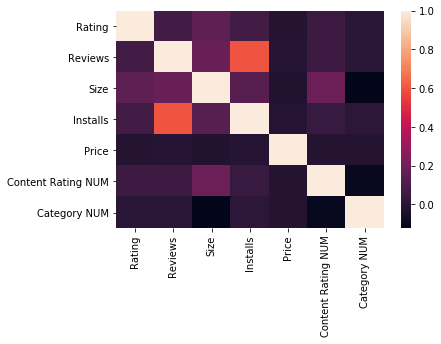

In [17]:
#Correlation Heatmap for numerical variables
sns.heatmap(gplay_df.corr())

# model prediction parameter

In [18]:
#Displaying the columns of the dataframe 
gplay_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Content Rating NUM', 'Category NUM'],
      dtype='object')

In [19]:
# Function for preprocessing 
cat_columns = ['Category','Type','Content Rating', 'Android Ver']
num_columns = ['Reviews','Size','Price', 'Installs']
def preprocess(gplay_df):
  preprocess_features = pd.DataFrame()
  for i in cat_columns:
    preprocess_features[i] = gplay_df[i] 
    preprocess_features[i] = preprocess_features[i].astype('category')
  preprocess_features = pd.get_dummies(preprocess_features[cat_columns], drop_first = 'True')
  for i in num_columns:
    preprocess_features[i] = gplay_df[i].astype('float')
  return preprocess_features

def preprocess_target(gplay_df):
  output_targets = gplay_df['Rating'].astype('float')
  return output_targets

In [20]:
#Data after preprocessing
gplay_df =gplay_df.fillna(0)
preproc_data = preprocess(gplay_df)
target = preprocess_target(gplay_df)

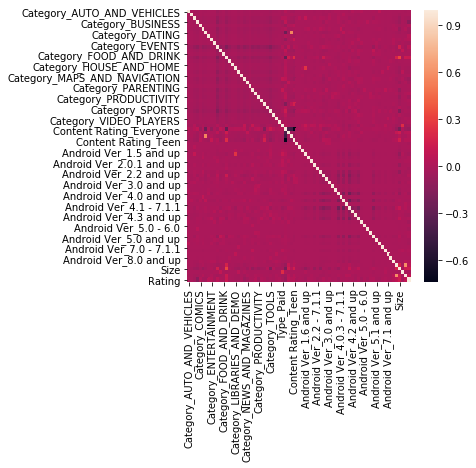

In [21]:
#Correlation for preproc_data
plt.figure(figsize = (5,5))
x = pd.concat([preproc_data, target], 1)
sns.heatmap(x.corr())

In [22]:
#Checking the shapes of the preprocessed data and the target variable 'Rating'
print(preproc_data.shape)
print(target.shape)

(8430, 75)
(8430,)


In [23]:
# Features selection
features = ['Category NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM']
X = gplay_df[features]
# Label selection
y = gplay_df.Rating
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y)


In [24]:
# Loop is used to get more generalized result
from sklearn import metrics

total_sum = []
for i in range(1):
 # Hypertuning of parameters for better prediction
 forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
 forest_model.fit(X, y)
 # For testing purpose
 forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 # 1st value = Category NUM
 # 2nd value = Reviews
 # 3rd value = Size
 # 4th value = Installs
 # 5th value = Price
 # 6th value = Content Rating NUM
 forest_pred = forest_model.predict([[4,100000,20,1000000,5,1]])
 total_sum.append(forest_pred)
 # For testing purpose
 forest_pred = forest_model.predict(test_X)
 r=metrics.mean_absolute_error(forest_pred, test_y)
 print(r)
 

0.669045682573903


In [36]:
k = round(np.median(total_sum), 2)
print(k)


4.42


In [28]:
a = np.array([r,k])


x = pd.DataFrame(data =[a], columns = ['absolute_error','prediction'], index = ['Random Forest'])

x

,absolute_error,prediction
Random Forest,0.669046,4.42
